In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Initial Condition

In [3]:
#Initial value
a0 = [0,0,0, 1,0,0, 1,0,0, 2,1,1] #inital point
m1 = 10 # mass1
m2 = 1 # mass2
G = 1 # Grav. force
it = 0 #iteration number
c = [a0] # to assign intial point with name
step = 100000 #number of iteration
M = m1 + m2 # total mass
mu  = (m1*m2)/M # reduced mass
start = 0 #t_start
end = 10 #t_end
h = end/step  # time step
t = np.linspace(start,end,step)

Function 

0. gett

1. mag 

2. force

3. dist

In [4]:
#Input: array that contains the coordiate list
#output: coordinate list

def gett(array):
    return array[0].tolist()

#Calculate the magnitute of coordinate vector
#Input: list of coord vector
#Output: mag. of vector 
def mag(vec):
    v = 0
    for i in vec:
        v += i**2
    v = np.sqrt(v)
    return v

#Calculate the force of m1 and m2 and retun if they are same
#Input: 12 by 1 vector with position and velocity of m1 and m2
#Output: bool.
def force(vec):
    test_r1 = vec[:3]
    test_r2 = vec[3:6]
    r12,r21 = [],[]

    test_r = 0
    for i in range(3):
        test_r += (test_r1[i]-test_r2[i])**2
        rr12 = test_r1[i] -test_r2[i]
        r12.append(rr12)
        rr21 = test_r2[i] - test_r1[i]
        r21.append(rr21)
    test_r = np.sqrt(test_r)



    F21 = np.dot(G*m1*m2/test_r,r21)
    F12 = np.dot(G*m1*m2/test_r,r12)
    
    return mag(F21)- mag(F12) == 0

#Checked F_21 = F_12 for all

In [5]:
#############Calcualtion of relativistic coordinate
# Part 1: Inital calculation

A, E, m1x, m1y, m1z, m2x, m2y, m2z,m1vx,m1vy,m1vz,m2vx,m2vy,m2vz = ([] for i in range(14))
rel_r1,rel_r2,rel_v1,rel_v2 = ([] for i in range(4))
P = []

x1,y1,z1, x2,y2,z2, vx1,vy1,vz1, vx2,vy2,vz2 = c[0] # name the components of inital point

# Assign the inital points in each of list

m1x = [a0[0]]
m1y = [a0[1]]
m1z = [a0[2]]
m2x = [a0[3]]
m2y = [a0[4]]
m2z = [a0[5]]
m1vx = [a0[6]]
m1vy = [a0[7]]
m1vz = [a0[8]]
m2vx = [a0[9]]
m2vy = [a0[10]]
m2vz = [a0[11]]


# r = |r1-r2|
r = np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)

# v = |v1-v2|
v = np.sqrt((vx1-vx2)**2+(vy1-vy2)**2+(vz1-vz2)**2) 

#######################################################
rel_rx1 = (m1*x1+m2*x2)/M + m2/M*(x1-x2)

rel_ry1 = (m1*y1+m2*y2)/M + m2/M*(y1-y2)

rel_rz1 = (m1*z1+m2*z2)/M + m2/M*(z1-z2)

rel_rx2 = (m1*x1+m2*x2)/M + m1/M*(x2-x1)

rel_ry2 = (m1*y1+m2*y2)/M + m1/M*(y2-y1)

rel_rz2 = (m1*z1+m2*z2)/M + m1/M*(z2-z1)

rel_rvx1 = (m1*vx1+m2*vx2)/M + m2/M*(vx1-vx2)

rel_rvy1 = (m1*vy1+m2*vy2)/M + m2/M*(vy1-vy2)

rel_rvz1 = (m1*vz1+m2*vz2)/M + m2/M*(vz1-vz2)

rel_rvx2 = (m1*vx1+m2*vx2)/M + m1/M*(vx2-vx1)

rel_rvy2 = (m1*vy1+m2*vz2)/M + m1/M*(vy2-vy1)

rel_rvz2 = (m1*vz1+m2*vz2)/M + m1/M*(vz2-vz1) 


rm1x = [rel_rx1]
rm1y = [rel_ry1]
rm1z = [rel_rz1]
rm2x = [rel_rx2]
rm2y = [rel_ry2]
rm2z = [rel_rz2]
rm1vx = [rel_rvx1]
rm1vy = [rel_rvy1]
rm1vz = [rel_rvz1]
rm2vx = [rel_rvx2]
rm2vy = [rel_rvy2]
rm2vz = [rel_rvx2]




#######################################################



#initial position coord of m1, m2, and com, center of mass
R1 = [rel_rx1,rel_ry1,rel_rz1]
R2 = [rel_rx2,rel_ry2,rel_rz2]
R_cm = gett([(np.dot(m1,R1)+np.dot(m2,R2))/M]) 
#magnittue of m1, m2, and com
r1 = mag(R1)
r2 = mag(R2)
r_cm = mag(R_cm)
#initial velocity coord. of m1,m2 and com, respectively.

#Vi = initial coordinate vector of velocity
V1 = [rel_rvx1,rel_rvy1,rel_rvz1]
V2 = [rel_rvx2,rel_rvy2,rel_rvz2]
V_cm = gett([(np.dot(m1,V1)+np.dot(m2,V2))/M])

#v_cm = magnitude of vector
v_cm = mag(V_cm) #vel mag. of BaryCenter
v1 = mag(V1)  # vel mag. of m1
v2 = mag(V2) # vel mag. of m2


# Intial Angular momentum of com
p_cm = m1*v1+m2*v2
P.append(p_cm)
#l = np.cross(r , p_cm) # array
l = m1*(r1*v1)+m2*(r2*v2)

#A.append(mag(l))
A.append(l)
#Hamiltonian Energy calculation
#e = 1/2*M*v_cm**2 +1/2*mu*v**2 - G*m1*m2/r #+ potential energy 
e = 1/2*m1*v1**2 +1/2*m2*v2**2 +G*m1*m2/r
E.append(e)

#Test: momentum == constant.



In [6]:
print(e)

18.0


In [7]:
#Part 2: Euler Method
for i in range(len(t)-1):
    #Approximation of new values by Euler method
    x1,y1,z1, x2,y2,z2, vx1,vy1,vz1, vx2,vy2,vz2 = c[i]


    nx1 = x1 + h * vx1
    ny1 = y1 + h * vy1
    nz1 = z1 + h * vz1

    nx2 = x2 + h * vx2
    ny2 = y2 + h * vy2
    nz2 = z2 + h * vz2

    m1x.append(nx1)
    m1y.append(ny1)
    m1z.append(nz1)

    m2x.append(nx2)
    m2y.append(ny2)
    m2z.append(nz2)

    r = np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2) # r for the euler method

    nvx1 = vx1 + h * G/(r**3) * m2*(x2-x1)
    nvy1 = vy1 + h * G/(r**3) * m2*(y2-y1)
    nvz1 = vz1 + h * G/(r**3) * m2*(z2-z1)

    nvx2 = vx2 + h * G/(r**3) * m1*(x1-x2)
    nvy2 = vy2 + h * G/(r**3) * m1*(y1-y2)
    nvz2 = vz2 + h * G/(r**3) * m1*(z1-z2)

    m1vx.append(nvx1)
    m1vy.append(nvy1)
    m1vz.append(nvz1)

    m2vx.append(nvx2)
    m2vy.append(nvy2)
    m2vz.append(nvz2)
 
    c.append([nx1,ny1,nz1,nx2,ny2,nz2,nvx1,nvy1,nvz1,nvx2,nvy2,nvz2])
    
######################################################
    nrel_rx1 = (m1*nx1+m2*nx2)/M + m2/M*(nx1-nx2)

    nrel_ry1 = (m1*ny1+m2*ny2)/M + m2/M*(ny1-ny2)

    nrel_rz1 = (m1*nz1+m2*nz2)/M + m2/M*(nz1-nz2)

    nrel_rx2 = (m1*nx1+m2*nx2)/M + m1/M*(nx2-nx1)

    nrel_ry2 = (m1*ny1+m2*ny2)/M + m1/M*(ny2-ny1)

    nrel_rz2 = (m1*nz1+m2*nz2)/M + m1/M*(nz2-nz1)

    nrel_rvx1 = (m1*nvx1+m2*nvx2)/M + m2/M*(nvx1-nvx2)

    nrel_rvy1 = (m1*nvy1+m2*nvy2)/M + m2/M*(nvy1-nvy2)

    nrel_rvz1 = (m1*nvz1+m2*nvz2)/M + m2/M*(nvz1-nvz2)

    nrel_rvx2 = (m1*nvx1+m2*nvx2)/M + m1/M*(nvx2-nvx1)

    nrel_rvy2 = (m1*nvy1+m2*nvz2)/M + m1/M*(nvy2-nvy1)

    nrel_rvz2 = (m1*nvz1+m2*nvz2)/M + m1/M*(nvz2-nvz1) 


    rm1x.append(nrel_rx1)
    rm1y.append(nrel_ry1)
    rm1z.append(nrel_rz1)
    rm2x.append(nrel_rx2)
    rm2y.append(nrel_ry2)
    rm2z.append(nrel_rz2)
    rm1vx.append(nrel_rvx1)
    rm1vy.append(nrel_rvy1)
    rm1vz.append(nrel_rvz1)
    rm2vx.append(nrel_rvx2)
    rm2vy.append(nrel_rvy2)
    rm2vz.append(nrel_rvx2)




#######################################################





    
    #Calculation
    #using only coordiate with n

    # updated r
    nr = np.sqrt((nx1-nx2)**2+(ny1-ny2)**2+(nz1-nz2)**2) 
    # udpated v
    nv = np.sqrt((nvx1-nvx2)**2+(nvy1-nvy2)**2+(nvz1-nvz2)**2) #vel mag. of rel.


    #updated position of m1, m2, and R, resp.
    #nRi = coord. of position
    nR1 = [nrel_rx1,nrel_ry1 ,nrel_rz1 ]
    nR2 = [nrel_rx2,nrel_ry2 ,nrel_rz2 ]
    nR_cm = gett([(np.dot(m1,nR1) + np.dot(m2,nR2))/M])
    
    #nri = mag. of posotion
    nr1 = mag(nR1)
    nr2 = mag(nR2)
    nr_cm = mag(nR_cm)

    #updated velocity of m1,m2, and R, respectively.
    #Vi = velocity coordinates
    nV1 =  [rel_rvx1,rel_rvy1,rel_rvz1]
    nV2 = [rel_rvx2,rel_rvy2,rel_rvz2]
    nV_cm = gett([(np.dot(m1,nV1) + np.dot(m2,nV2))/M])
    
    #vi = magnitude of velocity
    nv1 = mag(nV1)  # vel mag. of m1
    nv2 = mag(nV2) # vel mag. of m2
    nv_cm = mag(nV_cm) # vel. mag. of barycenter

    # Angular momentum
    np_cm = m1*v1+m2*v2 # momentum
    P.append(np_cm)
    l = m1*(r1*v1)+m2*(r2*v2)

    A.append(l)

    # Hamiltonian energy 
    #e = p_cm**2/(2*M) + p**2/(2*mu) + G *m1 *m2 /r # potential energy of Bary center
    
    #e = 1/2*M*v_cm**2 + 1/2 * mu * v**2 - G *m1 *m2/ r_new
    
    #e = 1/2*mu*nv**2 + 1/2*M*v_cm**2- G*m1*m2/nr #+potential energy
    e = 1/2*m1*nv1**2 + 1/2*m2*nv2**2+ G*m1*m2/nr #+potential energy
    E.append(e)
    


    

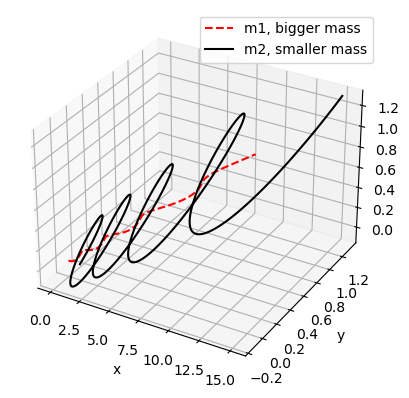

In [8]:
#Graph of planeary dynamics
ax = plt.axes(projection = '3d')
ax.grid()
ax.plot3D(m1x,m1y,m1z, 'r--', label = 'm1, bigger mass')
ax.plot3D(m2x,m2y,m2z, 'k', label = 'm2, smaller mass')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()

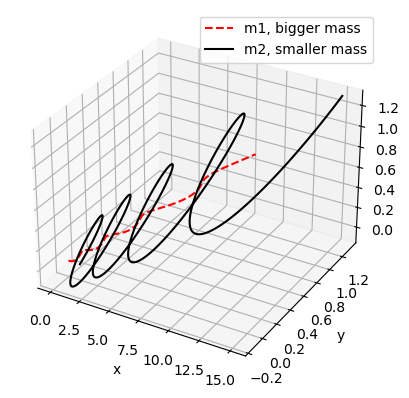

In [9]:
#Graph of relative planeary dynamics
ax = plt.axes(projection = '3d')
ax.grid()
ax.plot3D(rm1x,rm1y,rm1z, 'r--', label = 'm1, bigger mass')
ax.plot3D(rm2x,rm2y,rm2z, 'k', label = 'm2, smaller mass')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()

In [10]:
print(rm1z)

[0.0, 0.0, 0.0, 9.997000311443884e-13, 3.99820096057572e-12, 9.994005555308098e-12, 1.9985019539324293e-11, 3.4968552643896596e-11, 5.5941319664683936e-11, 8.389944149850021e-11, 1.1983844624106899e-10, 1.6475327016280544e-10, 2.196382588065711e-10, 2.854871680583234e-10, 3.6329316510934524e-10, 4.5404882959465716e-10, 5.587461545416943e-10, 6.783765474274034e-10, 8.139308313708654e-10, 9.66399245946447e-10, 1.1367714482680025e-09, 1.326036514208602e-09, 1.535182939186577e-09, 1.7651986393852487e-09, 2.0170709526202892e-09, 2.291786639478134e-09, 2.5903318844272896e-09, 2.913692296604379e-09, 3.2628529109254498e-09, 3.6387981893057017e-09, 4.042512021418428e-09, 4.474977725887636e-09, 4.937178051155414e-09, 5.430095176566126e-09, 5.95471071361325e-09, 6.512005706427269e-09, 7.102960633347758e-09, 7.728555407573914e-09, 8.38976937824875e-09, 9.087581331597514e-09, 9.822969491795046e-09, 1.0596911521995774e-08, 1.141038452541791e-08, 1.2264365046156609e-08, 1.3159829070539218e-08, 1.4097

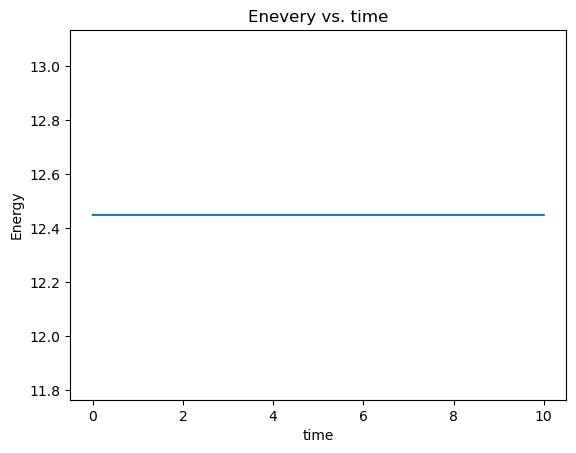

In [11]:
# Enevery vs. time
plt.title('Enevery vs. time')
plt.plot(t,P)
plt.xlabel('time')
plt.ylabel('Energy')
plt.show()

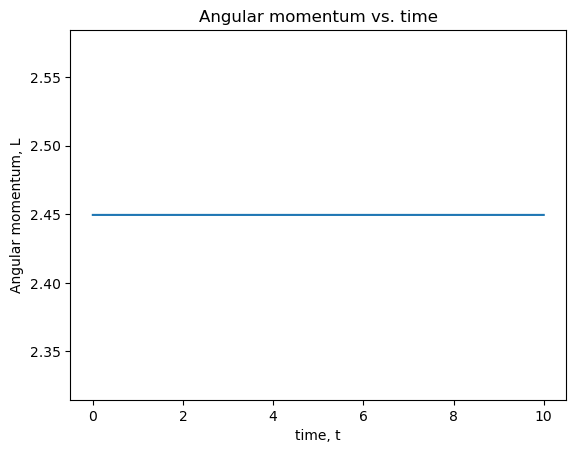

In [12]:
# Angular momentum vs. time
# Enevery vs. time
plt.title('Angular momentum vs. time')
plt.plot(t,A)
plt.xlabel('time, t')
plt.ylabel('Angular momentum, L')
plt.show()